In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # для регрессии

**The description of the dataset**

Rank - Ranking of overall sales (sorted by 'Global_Sales')

Name - The game's name

Platform - Platform of the game's release

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions of dollars)

EU_Sales - Sales in Europe (in millions of dollars)

JP_Sales - Sales in Japan (in millions of dollars)

Other_Sales - Sales in the rest of the world (in millions of dollars)

Global_Sales - Total worldwide sales.

**Goal:** to determine which game and where it is more profitable to release and with which company it is more profitable to interact

In [7]:
games = pd.read_csv('vgsales.csv')
games.head(7)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


In [8]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**Clearing data from unnecessary rows**|

In [9]:
print(games.shape)

(16598, 11)


In [10]:
games.dropna(inplace = True)
print(games.shape)

(16291, 11)


We see that the number of rows has decreased slightly, so we can throw them out of the dataset.

**Identifying the general trend**

Let's output the number of total sales for each year and see a downward trend in sales for these games, which indicates the need to create something new.

Text(0, 0.5, 'Share')

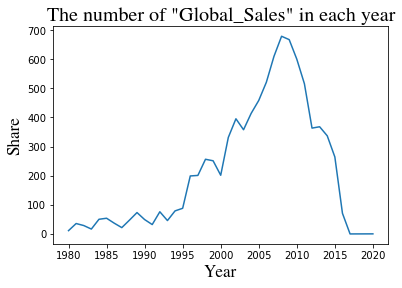

In [11]:
games_years = games.groupby('Year')['Global_Sales'].sum().to_frame()
plt.plot(games_years['Global_Sales']);
plt.title('The number of "Global_Sales" in each year', fontsize = 20, fontname = 'Times')
plt.xlabel('Year', fontsize = 17, fontname = 'Times')
plt.ylabel('Share', fontsize = 17, fontname = 'Times')

Выведем сам датасет, чтобы увидеть, какой год был самым успешным (это 2008 год)

Let's output the dataset itself to see which year was the most successful (this is 2008)

In [12]:
games_years = games.groupby('Year')['Global_Sales'].sum().sort_values(ascending = False).to_frame()
games_years

,Global_Sales
Year,
2008.0,678.90
2009.0,667.30
2007.0,609.92
2010.0,600.29
2006.0,521.04
2011.0,515.80
2005.0,458.51
2004.0,414.01
2002.0,395.52


Now we will display a graph showing the rate of sales growth relative to the previous year, not forgetting the general trend, especially the catastrophic drop in sales in recent years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

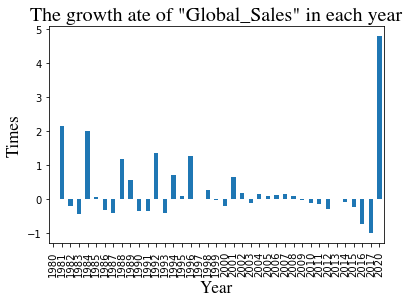

In [13]:
games_years = games.groupby('Year')['Global_Sales'].sum().to_frame()
games_years = games_years.pct_change()
games_years = games_years.reset_index()
games_years['Year'] = games_years['Year'].astype(int)
games_years = games_years.set_index('Year')
games_years['Global_Sales'].plot(kind = 'bar');
plt.title('The growth rate of "Global_Sales" in each year', fontsize = 20, fontname = 'Times')
plt.xlabel('Year', fontsize = 17, fontname = 'Times')
plt.ylabel('Times', fontsize = 17, fontname = 'Times')
plt.xticks(rotation='vertical')

Let's add a column with categories by "Global_Sales" with intervals of 5 million dollars.

In [14]:
maxx = games['Global_Sales'].max()
ranges = range(0, int(maxx) + 11, 5)
binsss = pd.cut(games['Global_Sales'], bins = ranges, right = True)
games_with_bins = games.assign(Global_Sales_Bins = binsss)
games_with_bins

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Bins
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,"(80, 85]"
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,"(40, 45]"
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,"(35, 40]"
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,"(30, 35]"
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,"(30, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,"(0, 5]"
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,"(0, 5]"
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,"(0, 5]"
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,"(0, 5]"


We are convinced that the vast majority of games are on the verge of extinction, or are popular in narrow circles.

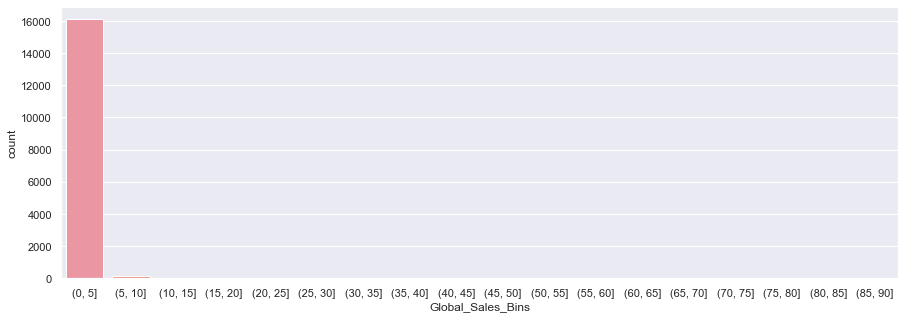

In [16]:
a = games_with_bins['Global_Sales_Bins']
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(data=games_with_bins, x = 'Global_Sales_Bins');

Another way to test this is to apply sns.joint plat, breaking down games, for example, by genre:

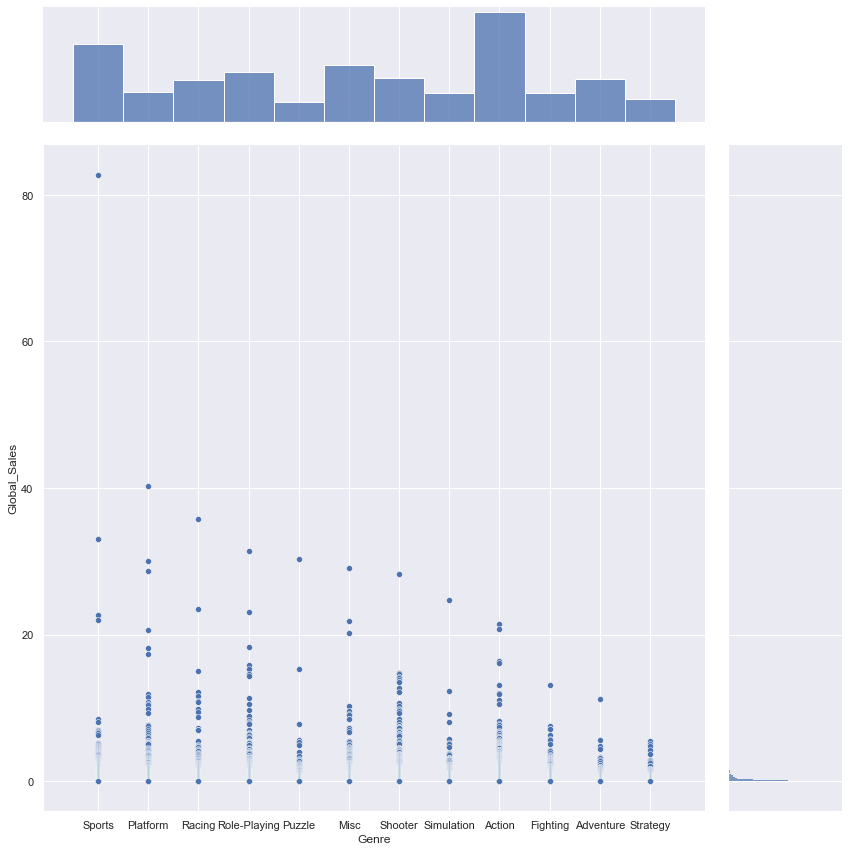

In [288]:
sns.jointplot(data = games, x = 'Genre', y = 'Global_Sales', kind = 'scatter', height = 12);

**Defining the category**

We will output the average and total number of sales for various game genres

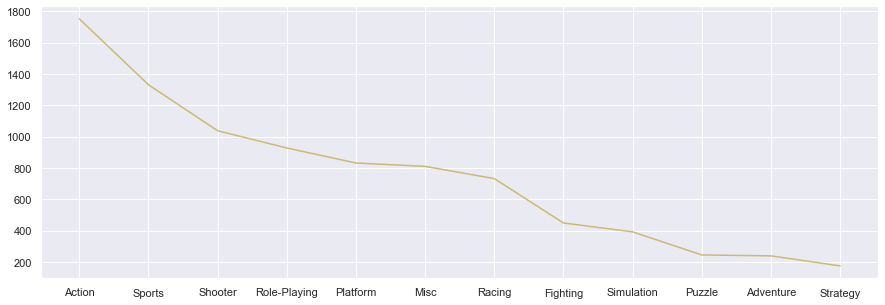

In [340]:
categories_sum = games.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False).to_frame()
plt.plot(categories_sum['Global_Sales'], color = 'y');

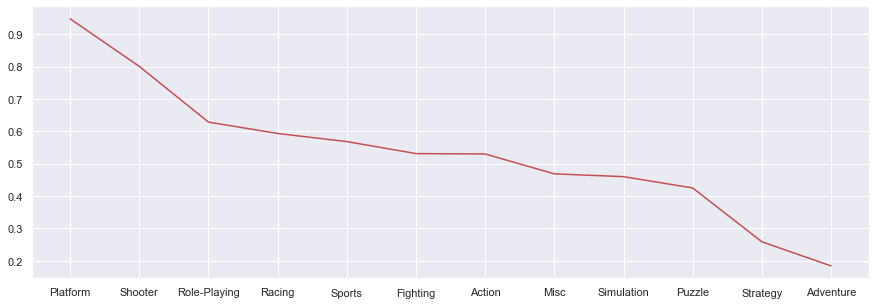

In [291]:
categories_mean = games.groupby('Genre')['Global_Sales'].mean().sort_values(ascending = False).to_frame()
a = plt.plot(categories_mean['Global_Sales'], color = 'r')

We observe a completely different picture...we will do the same for the last 5 and 10 years for greater awareness, only now through datasets

In [292]:
categories_sum_last_10 = games.loc[games['Year'] >= 2010].groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False).to_frame()
categories_sum_last_5 = games.loc[games['Year'] >= 2015].groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False).to_frame()
categories_sum_last_5_and_10 = categories_sum_last_5.assign(Global_Sales_sum_10 = categories_sum_last_10)
categories_sum_last_5_and_10.rename(columns = {'Global_Sales':'Global_Sales_sum_5'}, inplace = True)
categories_sum_last_5_and_10

,Global_Sales_sum_5,Global_Sales_sum_10
Genre,,
Action,90.61,673.46
Shooter,84.37,462.80
Sports,56.14,324.80
Role-Playing,43.24,305.71
Misc,12.86,238.05
Fighting,11.64,82.08
Adventure,9.82,61.03
Racing,9.56,123.68
Platform,8.12,120.67


In [293]:
categories_mean_last_10 = games.loc[games['Year'] >= 2010].groupby('Genre')['Global_Sales'].mean().sort_values(ascending = False).to_frame()
categories_mean_last_5 = games.loc[games['Year'] >= 2015].groupby('Genre')['Global_Sales'].mean().sort_values(ascending = False).to_frame()
categories_mean_last_5_and_10 = categories_mean_last_5.assign(Global_Sales_mean_10 = categories_mean_last_10)
categories_mean_last_5_and_10.rename(columns = {'Global_Sales':'Global_Sales_mean_5'}, inplace = True)
categories_mean_last_5_and_10

,Global_Sales_mean_5,Global_Sales_mean_10
Genre,,
Shooter,1.278333,1.171646
Sports,0.561400,0.569825
Role-Playing,0.360333,0.548851
Platform,0.338333,0.804467
Fighting,0.332571,0.416650
Simulation,0.252000,0.343720
Racing,0.245128,0.530815
Action,0.242273,0.468331
Misc,0.225614,0.422824


Thus, it can be seen that the games of the "Shooter" category have the greatest potential, since they are not only leading in average value, but they also occupy the second place in the total number of sales, unlike "Action" games, which lose on average, and, therefore, have not been popular recently. Therefore, it is necessary to specialize in the production of shooters.

**Identify the target market**

Now let's find out where the most number of Shooters are sold

In [294]:
games_shooters = games.loc[games['Genre'] == 'Shooter']
print('NA_Sales:', games_shooters['NA_Sales'].sum(), 'EU_Sales:', games_shooters['EU_Sales'].sum(),
                 'JP_Sales:', games_shooters['JP_Sales'].sum(), 'Other_Sales:', games_shooters['Other_Sales'].sum())

NA_Sales: 575.16 EU_Sales: 310.45 JP_Sales: 38.18 Other_Sales: 101.9


We get that this is America, which means that the company's activities will be started there.

**Study of the competitive environment**

Let's deduce the share of the largest publishers on the world market over the past 10 years to determine the best cooperation

Text(0, 0.5, 'Share')

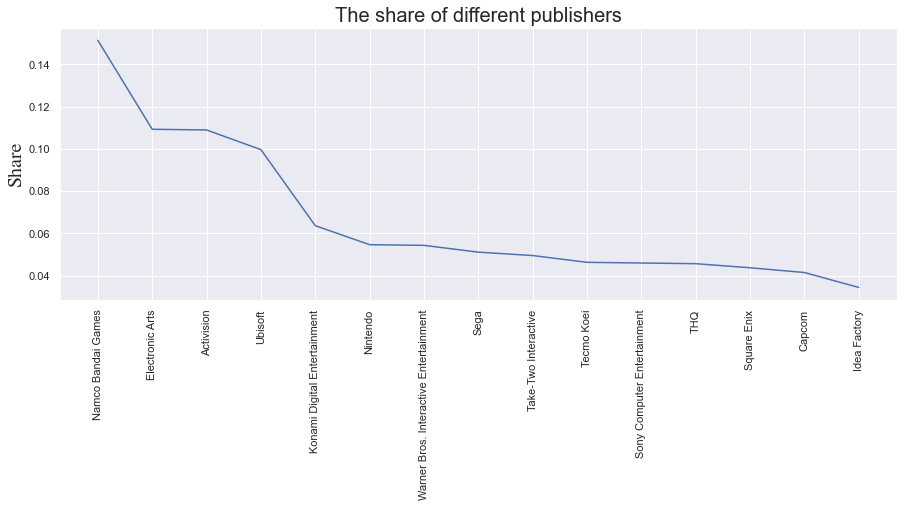

In [18]:
games_latest = games.loc[games['Year'] >= 2010]
publishers = games_latest['Publisher'].value_counts().to_frame()
publishers = publishers.loc[publishers['Publisher'] >= 100]
publishers = publishers.assign(Publisher_share = publishers['Publisher']/publishers['Publisher'].sum())
publishers
plt.plot(publishers['Publisher_share'])
plt.xticks(rotation='vertical'); # больше всего игр выпустила компания Electronic Arts
plt.title('The share of different publishers', fontsize = 20)
plt.ylabel('Share', fontsize = 20, fontname = 'Times')

We will also display the most popular Shooter publishers over the past 10 years

Text(0, 0.5, 'Number of Sales')

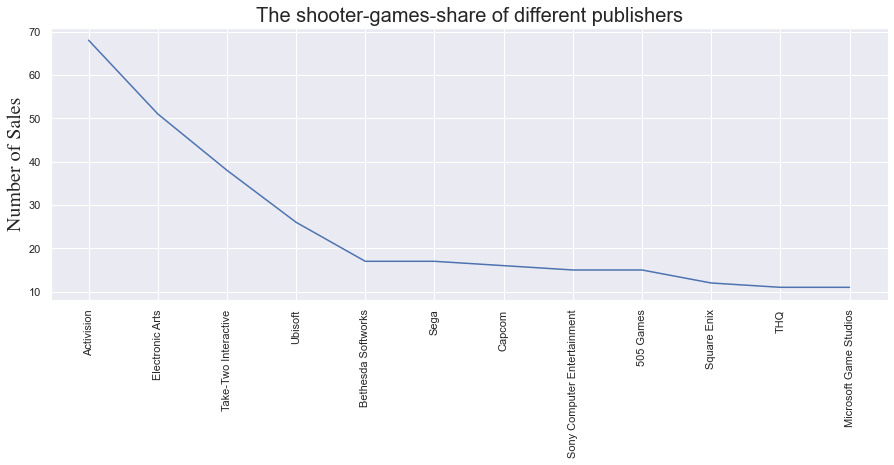

In [363]:
games_shooters_latest = games_shooters.loc[games_shooters['Year'] >= 2010]
games_shooters_publisher = games_shooters_latest['Publisher'].value_counts().to_frame()
games_shooters_publisher = games_shooters_publisher.loc[games_shooters_publisher['Publisher'] >= 10]
plt.plot(games_shooters_publisher['Publisher'])
plt.xticks(rotation='vertical');
plt.title('The shooter-games-share of different publishers', fontsize = 20)
plt.ylabel('Number of Sales', fontsize = 20, fontname = 'Times')

From the last two graphs, we can conclude which companies are the most promising in general and in the chosen field (production of shooter-games).
These are, for example, Activision, Electronic Arts, Ubisoft, etc. But with Namco, Bandai Games certainly should not be considered the main partners, since these companies do not specialize in Shooters.

**Learning about gaming platforms**

Consider the sales on each of the platforms as a whole, then only shooter games also over the past 10 years

Text(0, 0.5, 'Number of Sales')

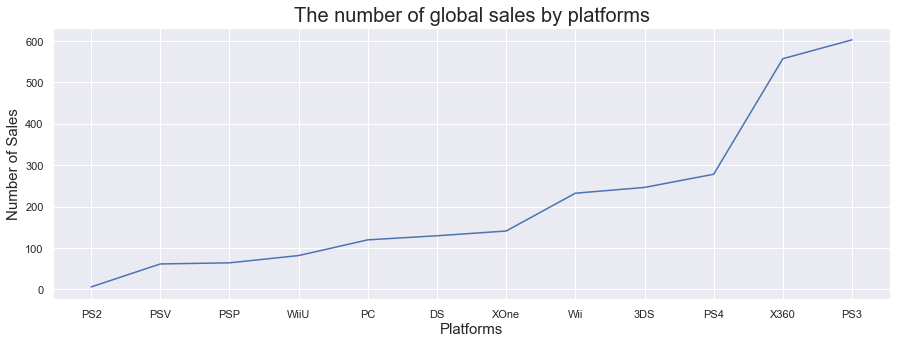

In [305]:
platforms_total_sales = games_latest.groupby('Platform')['Global_Sales'].sum().sort_values().to_frame()
plt.plot(platforms_total_sales['Global_Sales'])
plt.title('The number of global sales by platforms', fontdict = {'fontsize':20})
plt.xlabel('Platforms', fontsize = 15)
plt.ylabel('Number of Sales', fontsize = 15)

Text(0, 0.5, 'Number of Sales')

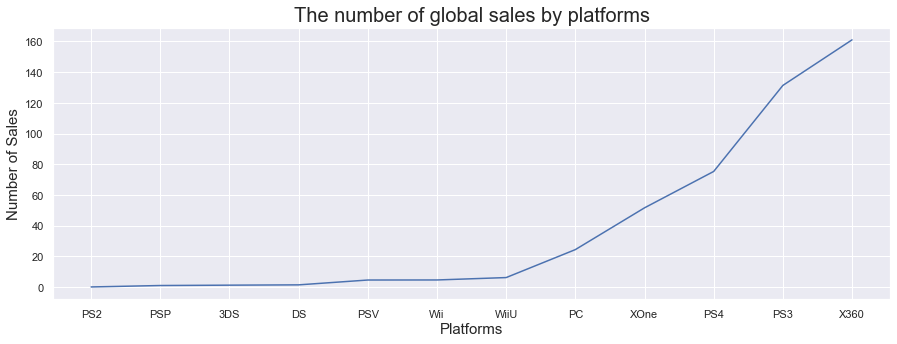

In [306]:
platforms_shooters = games_shooters_latest.groupby('Platform')['Global_Sales'].sum().sort_values().to_frame()
plt.plot(platforms_shooters['Global_Sales'])
plt.title('The number of global sales by platforms', fontdict = {'fontsize':20})
plt.xlabel('Platforms', fontsize = 15)
plt.ylabel('Number of Sales', fontsize = 15)

Thus, platforms such as PS3, PS4, X360, etc. will be the most preferred.

Let's draw more sales amounts for each of the platforms over the past 10 years using the sns.jointplot

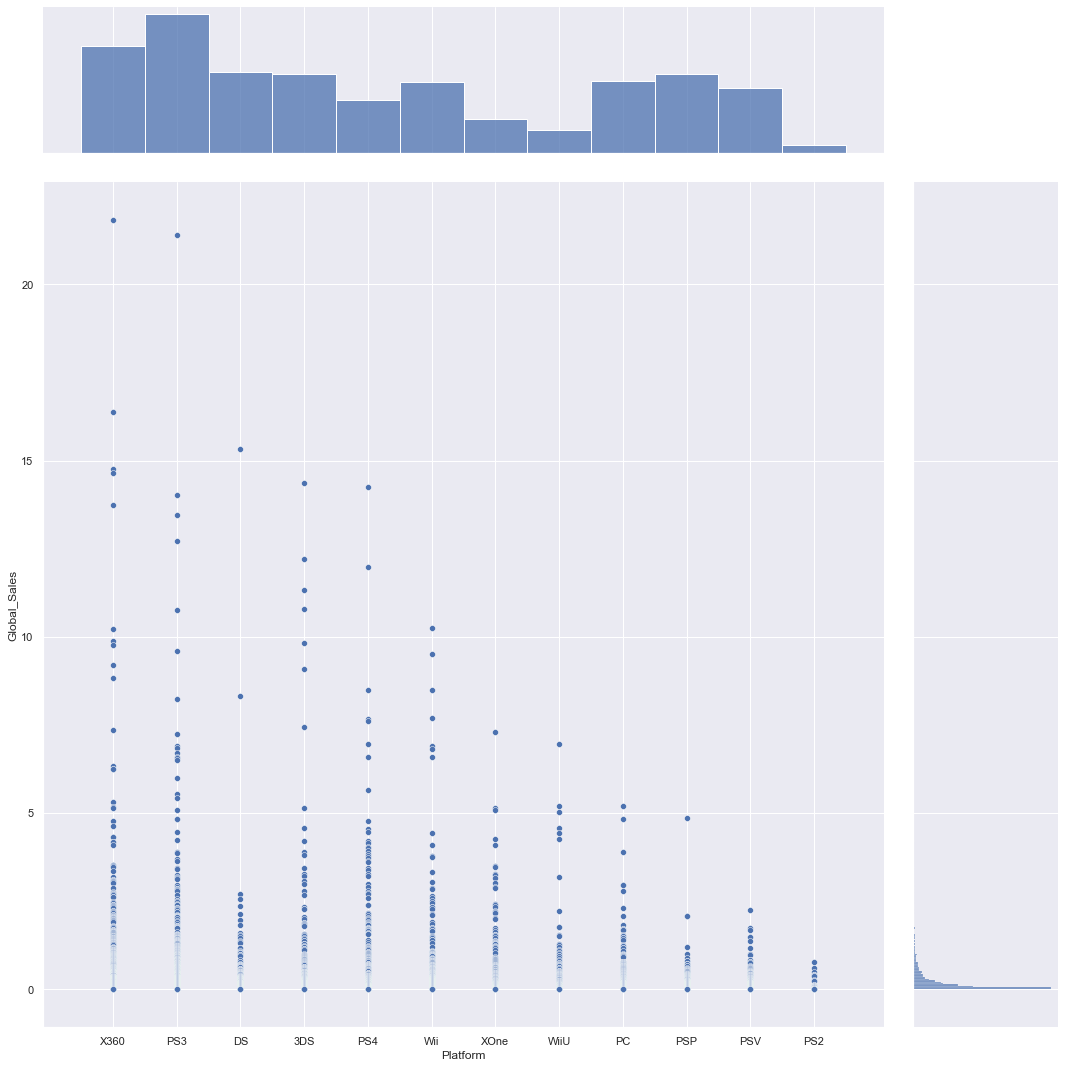

In [309]:
sns.jointplot(data = games_latest, x = 'Platform', y = 'Global_Sales', kind = 'scatter', height = 15);

**Let's look into the future...**

Now we use regression to estimate the amount of sales in the future when certain games are released.
Earlier we found out that most shooters are sold in America. Let's write down a program that, with a certain number of sales in America, will be able to predict the number of sales on the world market. This will help you decide whether to go out on it.

In [320]:
model_sales_1 = smf.ols(data = games, formula = 'Global_Sales ~ NA_Sales') # поставили задачу оптимизации
fit_sales_1 = model_sales_1.fit() # компьютер решил задачу оптимизации
fit_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.266e+05
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:28:32   Log-Likelihood:                -12749.
No. Observations:               16291   AIC:                         2.550e+04
Df Residuals:                   16289   BIC:                         2.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0644      0.004     14.777      0.000       0.056       0.073
NA_Sales       1.7938      0.005    355.783      0.000       1.784       1.804
==============================================================================
Omnibus:                     9587.887   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38495037.040
Skew:                           1.093   Prob(JB):                         0.00
Kurtosis:                     241.131   Cond. No.                         1.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
fit_sales.params

Intercept    0.064389
NA_Sales     1.793817
dtype: float64

In [317]:
games_action_new = pd.DataFrame({'NA_Sales': [1, 2]})
games_action_new

,NA_Sales
0,1
1,2


In [318]:
fit_sales.resid

0         8.250124
1       -11.988601
2         7.323604
3         4.682986
4        11.089288
           ...    
16593    -0.072327
16594    -0.072327
16595    -0.054389
16596    -0.054389
16597    -0.072327
Length: 16291, dtype: float64

In [319]:
fit_sales.predict(games_action_new)

0    1.858206
1    3.652024
dtype: float64

Thus, if sales in America are equal to, for example, 1 or 2 million dollars, then sales on the world market will
be approximately 1.86 and 3.65 million dollars, respectively.
Now let's try to predict what our sales will be in America if we release a game of a particular genre and for a particular platform

In [321]:
model_sales_2 = smf.ols(data = games, formula = 'NA_Sales ~ Genre + Platform')
fit_sales_2 = model_sales_2.fit()
fit_sales_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     19.95
Date:                Fri, 11 Dec 2020   Prob (F-statistic):          3.32e-141
Time:                        18:29:04   Log-Likelihood:                -19531.
No. Observations:               16291   AIC:                         3.915e+04
Df Residuals:                   16249   BIC:                         3.947e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.6544      0.075      8.703      0.000       0.507       0.802
Genre[T.Adventure]       -0.1373      0.027     -5.088      0.000      -0.190      -0.084
Genre[T.Fighting]         0.0074      0.032      0.235      0.815      -0.055       0.070
Genre[T.Misc]            -0.0348      0.025     -1.421      0.155      -0.083       0.013
Genre[T.Platform]         0.2103      0.031      6.732      0.000       0.149       0.272
Genre[T.Puzzle]          -0.0639      0.037     -1.710      0.087      -0.137       0.009
Genre[T.Racing]           0.0204      0.027      0.746      0.456      -0.033       0.074
Genre[T.Role-Playing]    -0.0151      0.026     -0.589      0.556      -0.065       0.035
Genre[T.Shooter]          0.1676      0.027      6.239      0.000       0.115       0.220
Genre[T.Simulation]      -0.0241      0.032     -0.762      0.446      -0.086       0.038
Genre[T.Sports]           0.0046      0.022      0.207      0.836      -0.039       0.048
Genre[T.Strategy]        -0.1095      0.035     -3.131      0.002      -0.178      -0.041
Platform[T.3DO]          -0.5793      0.470     -1.232      0.218      -1.501       0.342
Platform[T.3DS]          -0.4895      0.083     -5.892      0.000      -0.652      -0.327
Platform[T.DC]           -0.5420      0.135     -4.028      0.000      -0.806      -0.278
Platform[T.DS]           -0.4479      0.077     -5.811      0.000      -0.599      -0.297
Platform[T.GB]            0.5078      0.111      4.574      0.000       0.290       0.725
Platform[T.GBA]          -0.4578      0.080     -5.710      0.000      -0.615      -0.301
Platform[T.GC]           -0.4457      0.082     -5.406      0.000      -0.607      -0.284
Platform[T.GEN]           0.0131      0.172      0.076      0.939      -0.324       0.350
Platform[T.GG]           -0.8647      0.807     -1.071      0.284      -2.447       0.718
Platform[T.N64]          -0.2427      0.088     -2.771      0.006      -0.414      -0.071
Platform[T.NES]           0.5698      0.111      5.151      0.000       0.353       0.787
Platform[T.NG]           -0.6616      0.245     -2.699      0.007      -1.142      -0.181
Platform[T.PC]           -0.5481      0.080     -6.885      0.000      -0.704      -0.392
Platform[T.PCFX]         -0.6394      0.807     -0.792      0.428      -2.222       0.943
Platform[T.PS]           -0.3812      0.079     -4.855      0.000      -0.535      -0.227
Platform[T.PS2]          -0.3882      0.077     -5.046      0.000      -0.539      -0.237
Platform[T.PS3]          -0.3698      0.078     -4.740      0.000      -0.523      -0.217
Platform[T.PS4]          -0.3786      0.087     -4.368      0.000      -0.548      -0.209
Platform[T.PSP]          -0.5404      0.079     -6.879      0.000      -0.694      -0.386
Platform[T.PSV]        

In [325]:
games_new_2 = pd.DataFrame({'Genre': ['Shooter', 'Action', 'Adventure',], 'Platform': ['X360', 'PC','PS2']})
games_new_2

,Genre,Platform
0,Shooter,X360
1,Action,PC
2,Adventure,PS2


In [326]:
fit_sales_2.resid

0        41.096703
1        27.645516
2        15.440925
3        15.356703
4        10.122878
           ...    
16593    -0.396926
16594    -0.366285
16595    -0.286590
16596    -0.142585
16597    -0.396926
Length: 16291, dtype: float64

In [327]:
fit_sales_2.predict(games_new_2)

0    0.628477
1    0.106305
2    0.128873
dtype: float64

We see that indeed games of the shooter category released on a more popular platform are expected to bring much more revenue.
And, finally, we will predict the same thing, only focusing on the data of the last decade.

In [328]:
model_sales_3 = smf.ols(data = games_latest, formula = 'NA_Sales ~ Genre + Platform')
fit_sales_3 = model_sales_3.fit()
fit_sales_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     20.46
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           8.73e-78
Time:                        18:35:07   Log-Likelihood:                -4577.9
No. Observations:                5134   AIC:                             9202.
Df Residuals:                    5111   BIC:                             9352.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1457      0.029      4.977      0.000       0.088       0.203
Genre[T.Adventure]       -0.0875      0.031     -2.828      0.005      -0.148      -0.027
Genre[T.Fighting]        -0.0269      0.045     -0.596      0.551      -0.115       0.062
Genre[T.Misc]             0.0106      0.030      0.351      0.725      -0.049       0.070
Genre[T.Platform]         0.1738      0.051      3.406      0.001       0.074       0.274
Genre[T.Puzzle]          -0.0516      0.059     -0.873      0.383      -0.168       0.064
Genre[T.Racing]          -0.0473      0.042     -1.125      0.261      -0.130       0.035
Genre[T.Role-Playing]     0.0439      0.030      1.472      0.141      -0.015       0.102
Genre[T.Shooter]          0.3211      0.034      9.357      0.000       0.254       0.388
Genre[T.Simulation]      -0.0327      0.045     -0.728      0.466      -0.121       0.055
Genre[T.Sports]           0.0314      0.030      1.058      0.290      -0.027       0.090
Genre[T.Strategy]        -0.0424      0.049     -0.860      0.390      -0.139       0.054
Platform[T.DS]           -0.0182      0.038     -0.480      0.631      -0.092       0.056
Platform[T.PC]           -0.1017      0.039     -2.593      0.010      -0.179      -0.025
Platform[T.PS2]          -0.0895      0.093     -0.964      0.335      -0.271       0.092
Platform[T.PS3]           0.0742      0.034      2.207      0.027       0.008       0.140
Platform[T.PS4]           0.1036      0.042      2.462      0.014       0.021       0.186
Platform[T.PSP]          -0.1083      0.038     -2.824      0.005      -0.183      -0.033
Platform[T.PSV]          -0.1040      0.040     -2.615      0.009      -0.182      -0.026
Platform[T.Wii]           0.1127      0.039      2.870      0.004       0.036       0.190
Platform[T.WiiU]          0.0816      0.056      1.447      0.148      -0.029       0.192
Platform[T.X360]          0.2923      0.036      8.183      0.000       0.222       0.362
Platform[T.XOne]          0.1942      0.049      3.961      0.000       0.098       0.290
==============================================================================
Omnibus:                     7606.523   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3769569.155
Skew:                           8.929   Prob(JB):                         0.00
Kurtosis:                     134.540   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
games_new_3 = games_new_2
games_new_3

,Genre,Platform
0,Shooter,X360
1,Action,PC
2,Adventure,PS2


In [330]:
fit_sales_3.predict(games_new_3)

0    0.759029
1    0.044004
2   -0.031279
dtype: float64

Here, the income gap is already enormous, and when selling an Adventure-type game to an outdated PS2 platform, you can generally make a loss.

**GENERAL CONCLUSIONS**

Thus, even on the basis of such a very superficial analysis, it is possible to draw important conclusions.

**1)** A company entering the gaming industry market is recommended to specialize in Shooter, release games on the most popular platforms, which are, for example, X360 and PS4, with this you can calculate the estimated income.

**2)** The calculations given above can help determine how unpopular a platform or an unpopular type of game can be used to make a substantial profit if it is not possible to specialize in the most modern.

**3)** It is desirable to cooperate with companies that have something to learn from, namely Electronic Arts, Ubisoft and Activision.